## Introduction

For the final project in the Unsupervised Learning Algorithms class, I will be focusing on the dataset provided by HELP International on countries found here: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data. This data involves various countries across the globe and their associated GDP, Child Mortality Rates, Income per Capita, Life Expectancy, and a few other variables. HELP International is a group that looks to provide aid to countries that have development issues as well as those struck by disaster. In this analysis, I will look to group countries into first, second, and third world countries and then provide a list of countries that HELP International should look to fund in the future. I do want to note that this is completely data driven and is not an indictment on any one country. The analysis used will be a K-Means model as well as an Agglomerative Clustering model. 

## Data Import and EDA

After loading in the data, I'll want to look at some information on what the data actually holds in terms of columns, data types, and values.

In [2]:
# loading in almost all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import plotly.express as px
import matplotlib.patches as ptch
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
data = pd.read_csv("../input/unsupervised-learning-on-country-data/Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


It looks like there are a total of 10 columns, one being the country identifier and the rest being related to characteristics of the country. There are no null values, which means we won't have to deal with back-filling those. Let's take a look at the balance of GDP:

<AxesSubplot:>

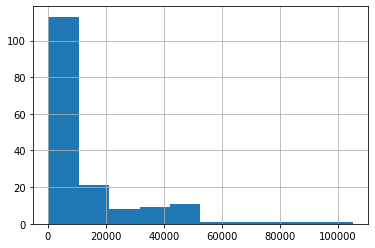

In [5]:
data.gdpp.hist()

While the histogram above shows that the vast majority of countries have a GDP below 10000, it does make sense as a few countries in the world tend to lead the way in the world's economy.

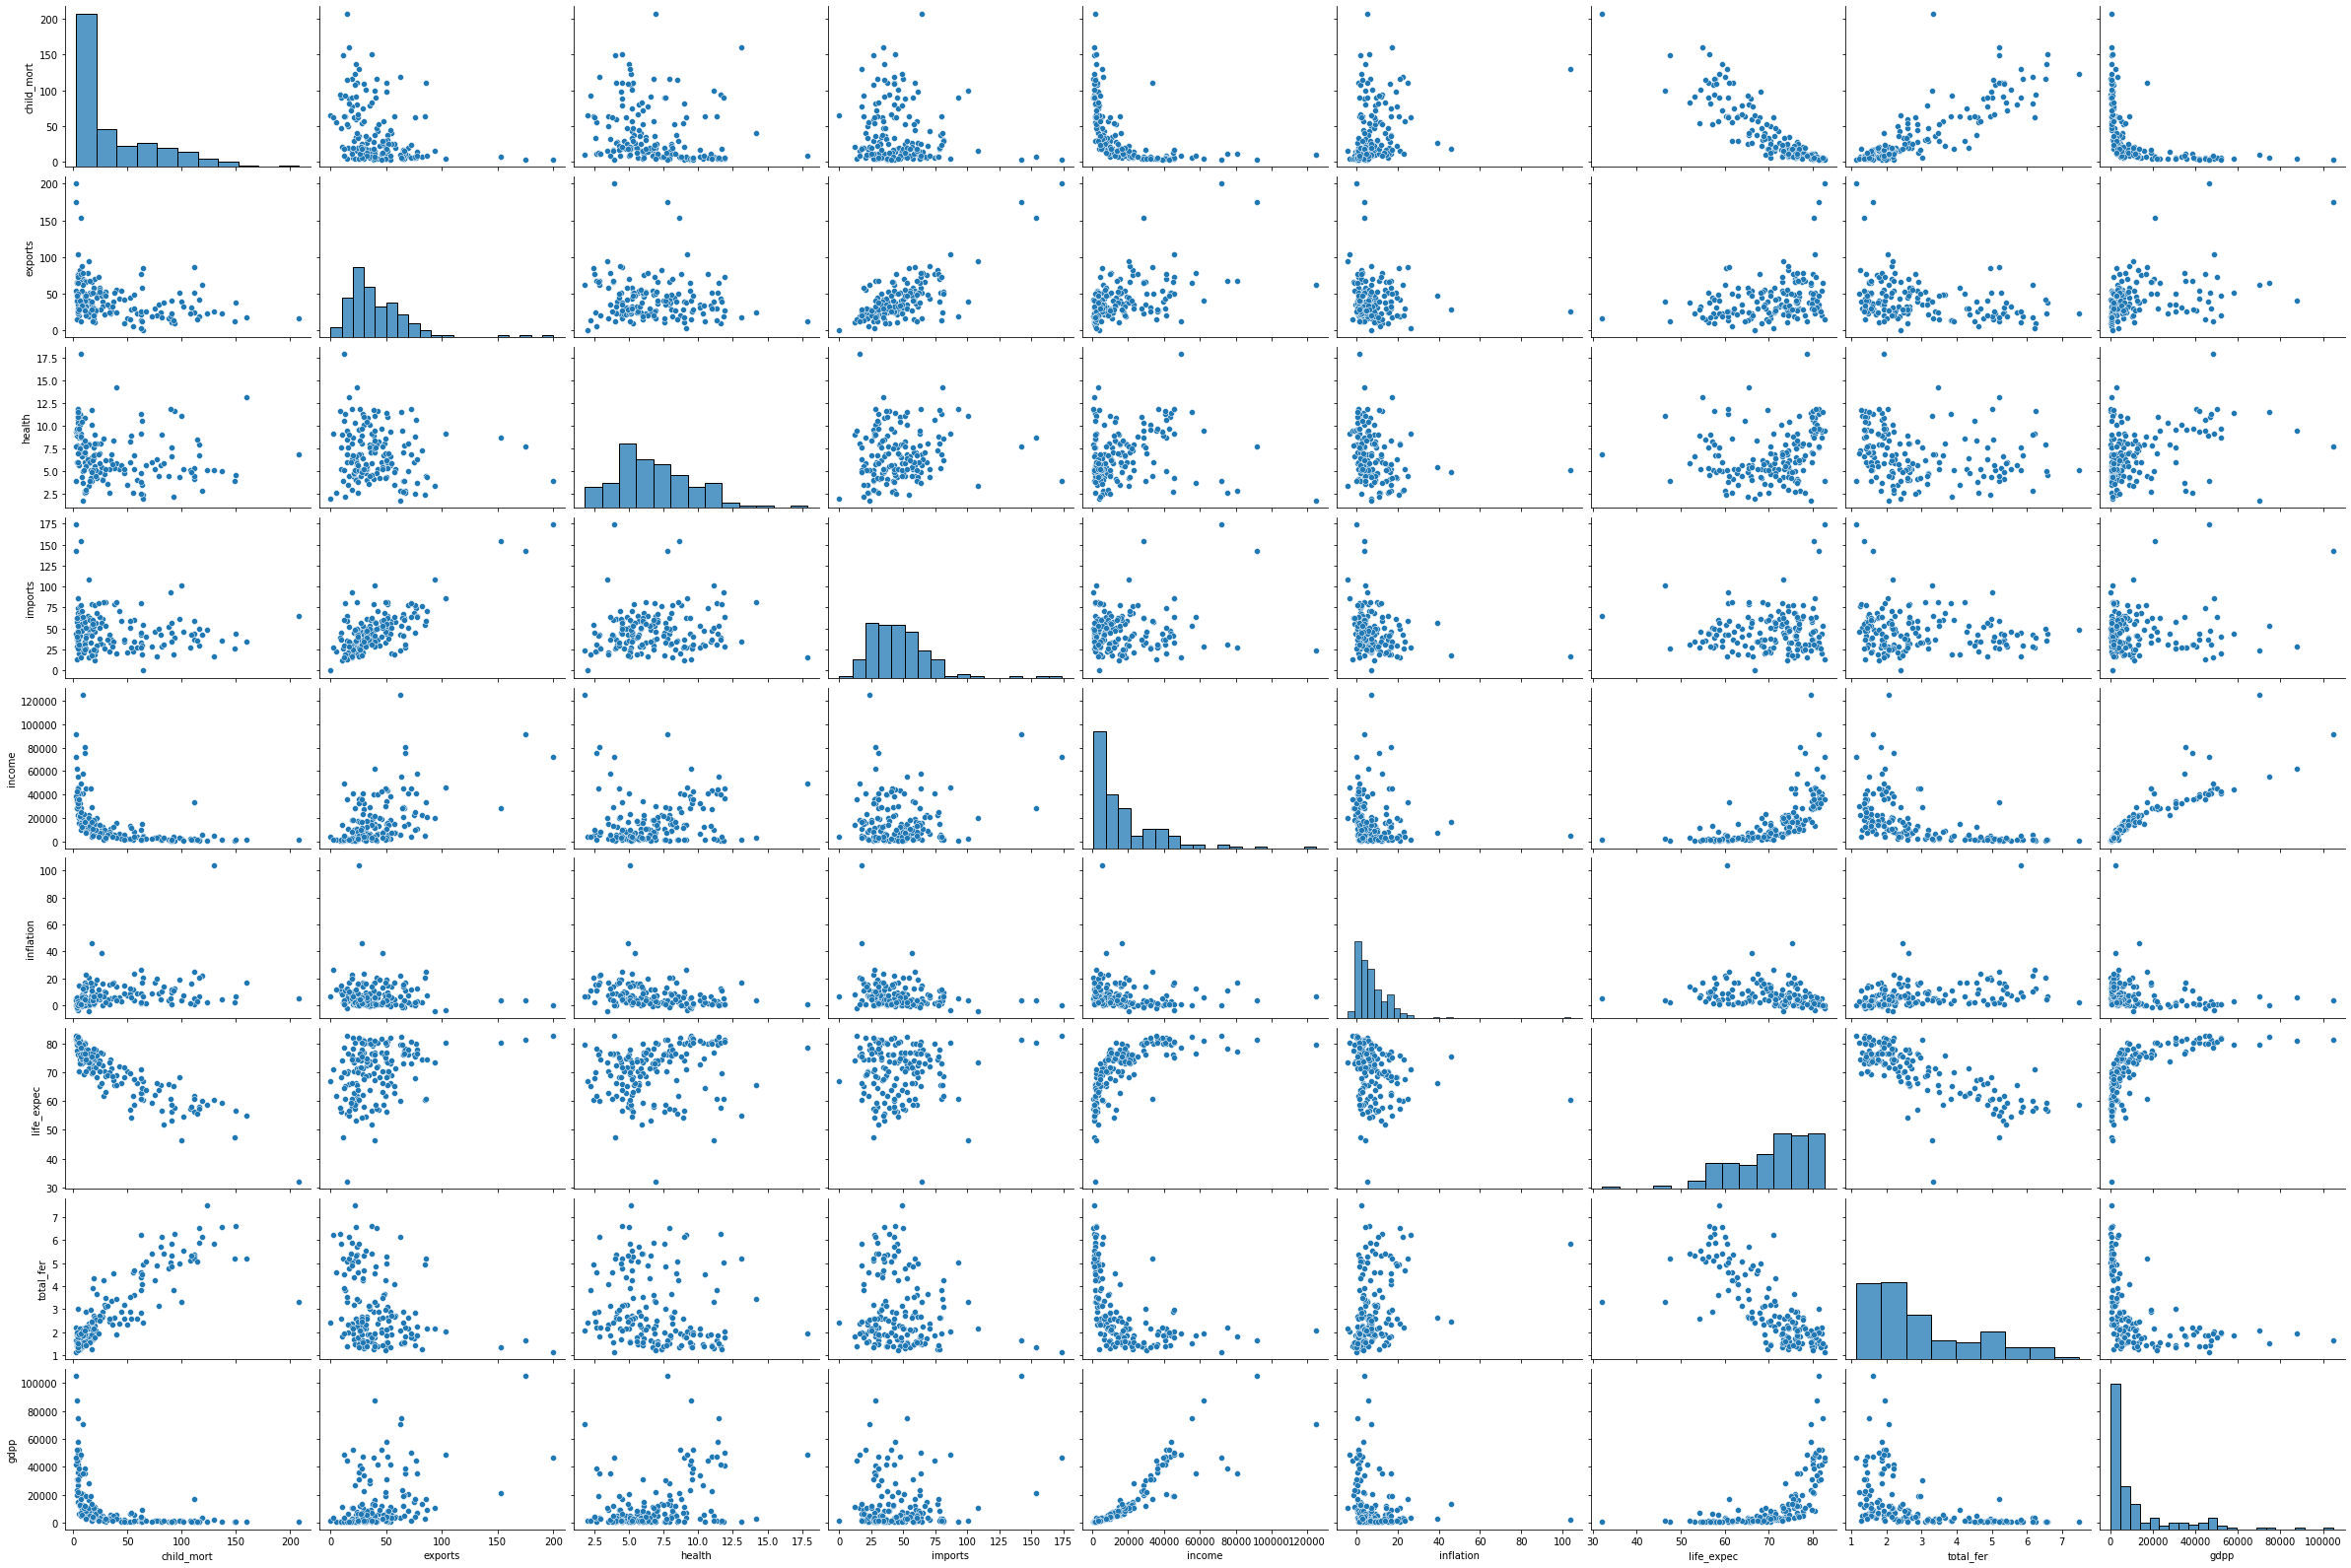

In [6]:
sns.pairplot(data.drop('country', axis=1), aspect=1.5)
plt.show()

Based on the above pairplots, it doesn't look like any of the columns are linearly dependent on one another. To explore the GDP further, we can use a Choropleth to view the GDP at the country level:

In [7]:
fig = px.choropleth(data,
                    locationmode='country names',
                    locations='country',
                    color='gdpp',
                    title='Coutries by gdpp'
                   )
fig.show()

Finally, we'll want to remove the country identifier from our data before we model anything, as that shouldn't have anything to do with the clusters.

In [8]:
data_clean = data.drop('country', axis =1)

## Modeling and Analysis

Now that we have clean data, we can look to create our two models: a K-Means Clustering Model and an Agglomerative Clustering Model. Both models will likely use 3 clusters, as we expect to utilize the first, second, and third world specifications, but to be sure, let's take a look at the Elbow Method for K-Means models to understand if there may be another approach to consider.

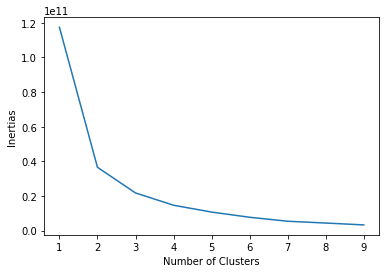

In [9]:
possibleKs = range(1,10)
inertias = []

for i in possibleKs:
    model = KMeans(i)
    model.fit(data_clean)
    inertias.append(model.inertia_)
    
plt.plot(possibleKs,inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.show()

Utilizing the elbow method, it looks like the number of clusters we should use should be 3. This makes sense with the data as we previously discussed, as there are generally thought to be first, second, and third world countries. With this in mind, we can move forward creating a simple K-Means model in order to get an idea what the clusters may look like.

In [10]:
c = 3
kmeansReg = KMeans(n_clusters=c, random_state=42)
ypred = kmeansReg.fit_predict(data_clean)

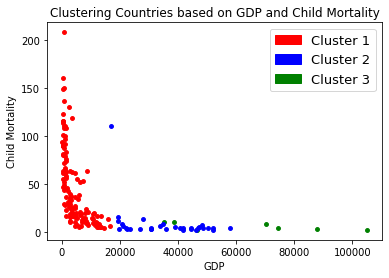

In [11]:
X = data.iloc[:, 1:].values

gdp = list(data.columns).index('gdpp') - 1 # minus one since we removed country name from the data frame
cm = list(data.columns).index('child_mort') - 1
red= ptch.Patch(color="red", label="Cluster 1")
blue= ptch.Patch(color="blue", label="Cluster 2")
green= ptch.Patch(color="green", label="Cluster 3")
plt.legend(handles=[red, blue, green], loc=1, prop={'size': 13})
plt.title('Clustering Countries based on GDP and Child Mortality')
plt.xlabel('GDP')
plt.ylabel('Child Mortality')
plt.scatter(X[ypred == 0, gdp], X[ypred == 0, cm], s = 15, c = 'red')
plt.scatter(X[ypred == 1, gdp], X[ypred == 1, cm], s = 15, c = 'green')
plt.scatter(X[ypred == 2, gdp], X[ypred == 2, cm], s = 15, c = 'blue')


Based on the above plot, it looks like the red cluster is the cluster that has lower GDP and higher Child Mortality, the bblue cluster is the cluster that has a medium amount of both GDP and Child Mortality, and the green cluster is the cluster with the highest values of GDP and lowest values of Child Mortality. This can also be seen in the centroids for each cluster:

In [12]:
kmeansReg.cluster_centers_

array([[4.73898437e+01, 3.58656172e+01, 6.33203125e+00, 4.59216086e+01,
        8.56924219e+03, 8.95764844e+00, 6.78734375e+01, 3.26335938e+00,
        4.43839063e+03],
       [6.22857143e+00, 9.64428571e+01, 5.71285714e+00, 6.85714286e+01,
        8.03428571e+04, 6.38871429e+00, 8.02857143e+01, 1.76714286e+00,
        6.54428571e+04],
       [8.80000000e+00, 4.99781250e+01, 8.99156250e+00, 4.60218750e+01,
        3.76218750e+04, 3.38331250e+00, 7.91562500e+01, 1.94468750e+00,
        3.55875000e+04]])

Just like the visuals, the cluster centroids suggest that the Child Mortality for the first cluster (red) is the highest, at 47.4% and the GDP is the lowest, at 443.8. In cluster two (green), the Child Mortality is at 6.2% and the GDP is at 65442.9, the lowest and highest respectively. Then, cluster three (blue) comes in the middle, with a Child Mortality at 8.8% and a GDP of 35587.5.

This would suggest that the countries that should be receiving the most funds from HELP International are the countries in the first cluster (red). Let's generate a list of those countries below using standardized values:

In [13]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=c,random_state=42)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(data_clean)

clusters = pipeline.predict(data_clean)
country = data.iloc[:,0]
finalClusters = pd.DataFrame({'Cluster':clusters,'Country':country})
print(finalClusters[finalClusters['Cluster'] == 1])


     Cluster                   Country
0          1               Afghanistan
3          1                    Angola
17         1                     Benin
21         1                  Botswana
25         1              Burkina Faso
26         1                   Burundi
28         1                  Cameroon
31         1  Central African Republic
32         1                      Chad
36         1                   Comoros
37         1          Congo, Dem. Rep.
38         1               Congo, Rep.
40         1             Cote d'Ivoire
49         1         Equatorial Guinea
50         1                   Eritrea
55         1                     Gabon
56         1                    Gambia
59         1                     Ghana
63         1                    Guinea
64         1             Guinea-Bissau
66         1                     Haiti
72         1                      Iraq
80         1                     Kenya
81         1                  Kiribati
84         1             

To explore the countries further, let's look at another Chloropleth:

In [14]:
finalClusters['Label'] = "Second World"

for i in range(0,len(finalClusters)-1):
    if finalClusters['Cluster'].iloc[i] == 0:
        finalClusters['Label'].iloc[i] = "First World"
    elif finalClusters['Cluster'].iloc[i] == 1:
        finalClusters['Label'].iloc[i] = "Third World"


fig = px.choropleth(finalClusters,
                    locationmode='country names',
                    locations='Country',
                    color='Label',
                    title='Countries by Cluster'
                   )
fig.show()

From this choropleth, it looks like most of the first world countries are in North America, Western Europe, or Australia, most of the second world countries are in South American or Eastern Eurasia, and most of the third world countries are in Africa. This does track with how the development of these countries has been over the past few years, though I would tend to not truly label any of these countries as better or worse than one another. In this case, third world is a country that has a lower GDP, higher Child Mortality rate, etc. The entire label description by column can be found below:

In [15]:
sumDf = pd.DataFrame(columns = ['Label', 'Child Mortality', 'Exports', 'Health', 'Imports', 'Income', 'Inflation', 'Life Expectancy', 'Total Fer', 'GDP'])

In [25]:
listOfLabels = ['Third', 'First', 'Second']
for i in range(0,c):
    sumDf.loc[i] = [listOfLabels[i]] + kmeansReg.cluster_centers_[i].round(3).tolist()
sumDf.sort_values(by = ['GDP'], ascending = False).reset_index().drop('index', axis = 1)

,Label,Child Mortality,Exports,Health,Imports,Income,Inflation,Life Expectancy,Total Fer,GDP
0,First,6.229,96.443,5.713,68.571,80342.857,6.389,80.286,1.767,65442.857
1,Second,8.800,49.978,8.992,46.022,37621.875,3.383,79.156,1.945,35587.500
2,Third,47.390,35.866,6.332,45.922,8569.242,8.958,67.873,3.263,4438.391


While this clustering would be enough to provide to the HELP International a list to let them know which countries they should focus on, let's also look at a different method in order to combine the two and come up with a definitive list of countries they should focus their funds on. To do so, I will employ Agglomerative Clustering.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



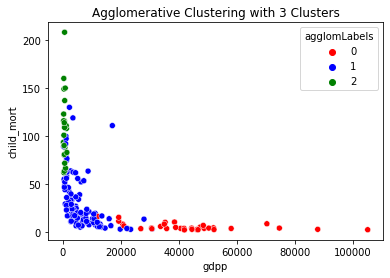

In [26]:
from sklearn.cluster import AgglomerativeClustering 

X = scaler.fit_transform(data_clean)

agglom = AgglomerativeClustering(n_clusters=c).fit(X)

data_clean['agglomLabels'] = agglom.labels_


sns.scatterplot(data_clean['gdpp'], data_clean['child_mort'], hue=data_clean['agglomLabels'], 
                palette=['red', 'blue', 'green'])
plt.title('Agglomerative Clustering with 3 Clusters')
plt.show()

Although the agglomerative clustering set the clusters up slightly differently than K-Means did, the logic is relatively the same. The green cluster is the cluster that has the lower GDPs and higher Child Mortality rates. The blue cluster is the cluster that has a medium GDP and a medium Child Mortality rate, and the red cluster follows the same logic as before as well. Now, in order to generate a final recommendation list to HELP International, a list of countries are considered "third world" in both the K-Means and Agglomerative Clustering models will be made.

In [27]:
finalClustersAgg = pd.DataFrame({'ClusterAgg':agglom.labels_,'Country':country})
finalClustersAgg['LabelAgg'] = "First World"

for i in range(0,len(finalClustersAgg)):
    if finalClustersAgg['ClusterAgg'].iloc[i] == 2:
        finalClustersAgg['LabelAgg'].iloc[i] = "Third World"
    elif finalClustersAgg['ClusterAgg'].iloc[i] == 1:
        finalClustersAgg['LabelAgg'].iloc[i] = "Second World"

# merging the two clustering outputs based on country
finalRec = pd.merge(finalClusters,finalClustersAgg,on='Country')
# merging them back to the original data
finalRec = pd.merge(finalRec, data, left_on = 'Country', right_on = 'country')
#outputing only the top 10 countries that are labeled as "Third World" and have the lowest gdp
finalRec = finalRec[(finalRec['Label'] == 'Third World')&(finalRec['LabelAgg'] == 'Third World')]
finalRec = finalRec.sort_values(by = 'gdpp')
finalRec['Country'][0:10]


26                      Burundi
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
150                        Togo
64                Guinea-Bissau
Name: Country, dtype: object

## Conclusions

Based on the combined list of the two clustering models that we created, it looks like the ten countries that should be recommended to HELP International are the following:

Burundi, Democratic Republic of Congo, Niger, Sierra Leone, Madagascar, Mozambique, Central African Repoublic, Malawi, Togo, and Guinea-Bissau

While this list isn't necessarily definitive, and does not take into account any disasters occuring, this could be a springboard for HELP International in order to get started. The countries on this list could likely use some form of assistance considering their overall low GDP and high Child Mortality rate, so hopefully the HELP International organization can make a real difference. In order to create a better analysis going forward, there could be more characteristics considered when looking at the clustering, as well as different hyper-parameters, including a different number of clusters. Also, including information on occurence of disasters could prove invaluable, as we could possibly predict where emergency groups could be located in the future.